In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("penguins.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


In [6]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [7]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693,2008.043796
std,5.195566,2.013410,15.047938,835.933105,0.806281
min,32.100000,13.100000,172.000000,2850.000000,2007.000000
25%,38.350000,15.000000,190.000000,3600.000000,2007.000000
50%,42.000000,17.000000,198.000000,4262.500000,2008.000000
75%,46.675000,18.500000,215.000000,4950.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [8]:
df["species"].value_counts()

species
Adelie    151
Gentoo    123
Name: count, dtype: int64

In [9]:
df["island"].value_counts()

island
Biscoe       167
Dream         56
Torgersen     51
Name: count, dtype: int64

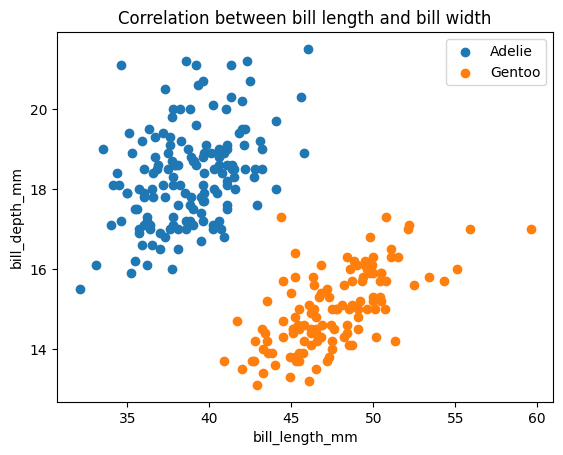

In [10]:
%matplotlib inline
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.title("Correlation between bill length and bill width")
plt.scatter(df["bill_lenght_mm"][df["species"]=="Adelie"], df["bill_depth_mm"][df["species"]=="Adelie"], label="Adelie")
plt.scatter(df["bill_lenght_mm"][df["species"]=="Gentoo"], df["bill_depth_mm"][df["species"]=="Gentoo"], label="Gentoo")
plt.legend()
plt.show()

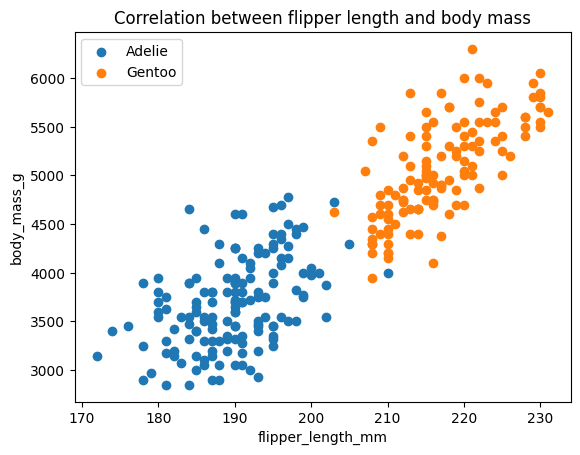

In [11]:
%matplotlib inline
plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")
plt.title("Correlation between flipper length and body mass")
plt.scatter(df["flipper_length_mm"][df["species"]=="Adelie"], df["body_mass_g"][df["species"]=="Adelie"], label="Adelie")
plt.scatter(df["flipper_length_mm"][df["species"]=="Gentoo"], df["body_mass_g"][df["species"]=="Gentoo"], label="Gentoo")
plt.legend()
plt.show()

<Axes: >

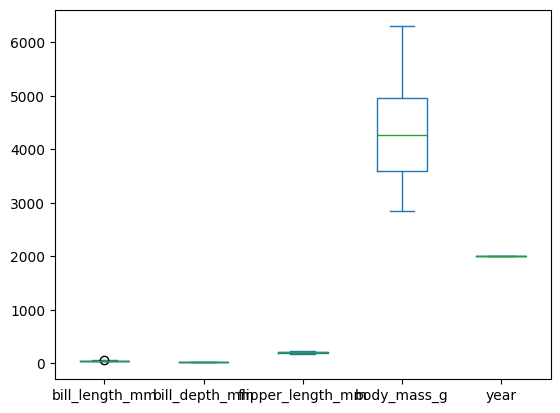

In [12]:
df.plot.box()

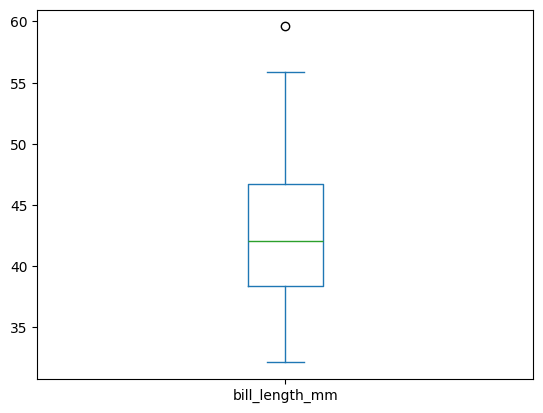

In [13]:
df["bill_length_mm"].plot.box()
plt.show()

In [14]:
dummy = df["bill_length_mm"]

In [15]:
df["bill_length_mm"].quantile([0.95, 0.97, 0.99, 0.995, 0.997])

0.950    50.7350
0.970    51.4620
0.990    54.5160
0.995    55.6080
0.997    56.5697
Name: bill_length_mm, dtype: float64

In [16]:
df["bill_length_mm"].quantile([0.25, 0.5, 0.75])

0.25    38.350
0.50    42.000
0.75    46.675
Name: bill_length_mm, dtype: float64

In [17]:
df["bill_length_mm"] = list(map(lambda x: dummy.mean() if x > 56.56 else x, dummy))

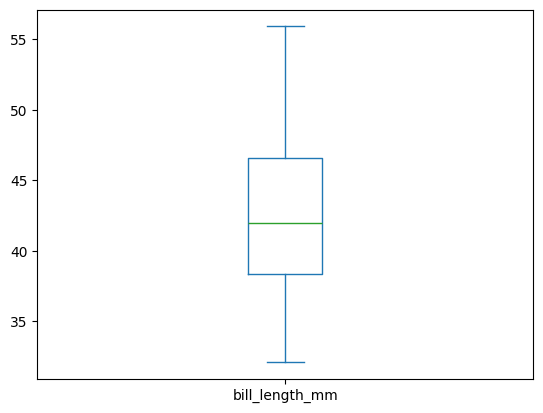

In [18]:
df["bill_length_mm"].plot.box()
plt.show()

In [19]:
new_df = pd.get_dummies(df, columns=["island"], drop_first=True, dtype="int")
new_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2007,0,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,1
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,1
3,Adelie,36.7,19.3,193.0,3450.0,2007,0,1
4,Adelie,39.3,20.6,190.0,3650.0,2007,0,1
...,...,...,...,...,...,...,...,...
269,Gentoo,47.2,13.7,214.0,4925.0,2009,0,0
270,Gentoo,46.8,14.3,215.0,4850.0,2009,0,0
271,Gentoo,50.4,15.7,222.0,5750.0,2009,0,0
272,Gentoo,45.2,14.8,212.0,5200.0,2009,0,0


In [20]:
data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009
273,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,2009


In [21]:
X_tr, X_te, y_tr, y_te = train_test_split(new_df.drop("species", axis=1), new_df["species"],
                                         train_size=0.8, random_state=23)

In [22]:
lr = LogisticRegression()
lr.fit(X_tr, y_tr)
print("Triaining Score", lr.score(X_tr, y_tr))
y_pred = lr.predict(X_te)
print("Testing Score", accuracy_score(y_te, y_pred))

Triaining Score 1.0
Testing Score 0.9818181818181818


In [23]:
svc = SVC(kernel="linear")
svc.fit(X_tr, y_tr)
print("Triaining Score", svc.score(X_tr, y_tr))
y_pred = svc.predict(X_te)
print("Testing Score", accuracy_score(y_te, y_pred))

Triaining Score 1.0
Testing Score 1.0


In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_tr, y_tr)
print("Triaining Score", dt.score(X_tr, y_tr))
y_pred = dt.predict(X_te)
print("Testing Score", accuracy_score(y_te, y_pred))

Triaining Score 1.0
Testing Score 0.9818181818181818


In [25]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_tr, y_tr)
print("Triaining Score", knn.score(X_tr, y_tr))
y_pred = knn.predict(X_te)
print("Testing Score", accuracy_score(y_te, y_pred))

Triaining Score 0.9497716894977168
Testing Score 0.9090909090909091
